In [1]:
library(graphicalExtremes)
library(maxstablePCA)
library(GGally)
library(dplyr)
library(Matrix)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
set.seed(9092024)

In [3]:
danube$info

RivNames,Lat,Long,AveVol,Lat_Center,Long_Center,Alt,Area,Chos,Density,Slope,PlotCoordX,PlotCoordY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Donau,48.58200,13.504000,1423.00000,48.19434,11.537729,826.6172,9.24909687,4,4870.474,13.264409,0,0
Donau,48.67663,13.115173,638.87746,48.51557,11.131992,624.3137,5.76796492,5,5003.040,9.885689,-2,-1
Donau,48.87976,12.747233,456.92169,48.62814,10.997088,603.4865,4.58691170,6,4896.329,9.518746,-4,-2
Donau,49.02358,12.138709,446.94998,48.61170,10.909059,615.9089,4.30697944,7,4907.390,9.648475,-4,-4
Donau,48.94696,12.014945,351.88196,48.33618,10.419301,649.6616,3.18819483,8,5019.066,9.845116,-2,-4
Donau,48.91661,11.864296,329.31747,48.23405,10.310134,674.7989,2.78700337,9,5072.189,10.068094,-2,-6
Donau,48.75742,11.426064,312.06499,48.18079,10.156106,707.6364,2.45730480,10,5115.251,10.489882,-2,-8
Donau,48.71074,10.801443,191.21095,48.24435,9.949147,653.4999,1.83826254,11,5066.171,9.351132,-2,-10
Donau,48.56840,10.500539,162.04203,48.09448,9.798394,701.1765,1.44211361,12,5130.739,9.788958,-2,-12


### Transform data to (approxmately) unit Pareto scale for the spectral measure estimator

In [4]:
Xtrafo <- transform_unitpareto(danube$data_clustered)

In [5]:
dim(Xtrafo)

[1] 428  31

In [6]:
summary(rowSums(Xtrafo))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.48   47.70   70.62  206.61  139.21 7092.21 

In [7]:
quantile(rowSums(Xtrafo), c(0.75, 0.8, 0.9, 0.95, 0.99), na.rm = T)

75%       80%       90%       95%       99% 
 139.2090  179.3545  377.9689  734.2403 2422.6935

In [8]:
length(which(apply(Xtrafo, 1, max) > 10))

[1] 117

For comparability with other methods, we use the same data, therefore choose the $l_{\infty}$-norm and set the threshold to the $0.1$ quantile of a standard pareto distribution. 

### Run the extremal PCA fits 

In [9]:
Xsphere <- t(apply(Xtrafo, 1, function(z) z / max(z)))
Xsphere <- Xsphere[which(apply(Xtrafo, 1, max) > 10), ]

In [10]:
specdecomp <- eigen(t(Xsphere) %*% Xsphere / 117)
specdecomp

eigen() decomposition
$values
 [1] 3.546300980 0.425474298 0.334800990 0.197831723 0.147402500 0.138535383
 [7] 0.100702548 0.049739725 0.039491939 0.024920208 0.024097070 0.018763672
[13] 0.014651236 0.012780795 0.011545448 0.010190902 0.009435911 0.007796057
[19] 0.007398298 0.006205594 0.005918799 0.005258325 0.004787018 0.004160525
[25] 0.003601415 0.003016159 0.002649505 0.002059084 0.001794380 0.001328053
[31] 0.001115416

$vectors
            [,1]         [,2]         [,3]         [,4]         [,5]
 [1,] -0.1800225  0.096446217  0.076316752 -0.004589768  0.132285211
 [2,] -0.1726358 -0.085705843 -0.074074221  0.068433887  0.155936534
 [3,] -0.1729024 -0.134904938 -0.051968575 -0.035712678  0.107863345
 [4,] -0.1734663 -0.150108959 -0.066369241 -0.062550418  0.111023104
 [5,] -0.1807953 -0.102034155 -0.182619714 -0.041993445  0.108926692
 [6,] -0.1791170 -0.088712939 -0.184717248 -0.042303375  0.091272919
 [7,] -0.1828094 -0.085380850 -0.182896414 -0.050840793  0.088075103
 [8,] 

Saving 6.67 x 6.67 in image


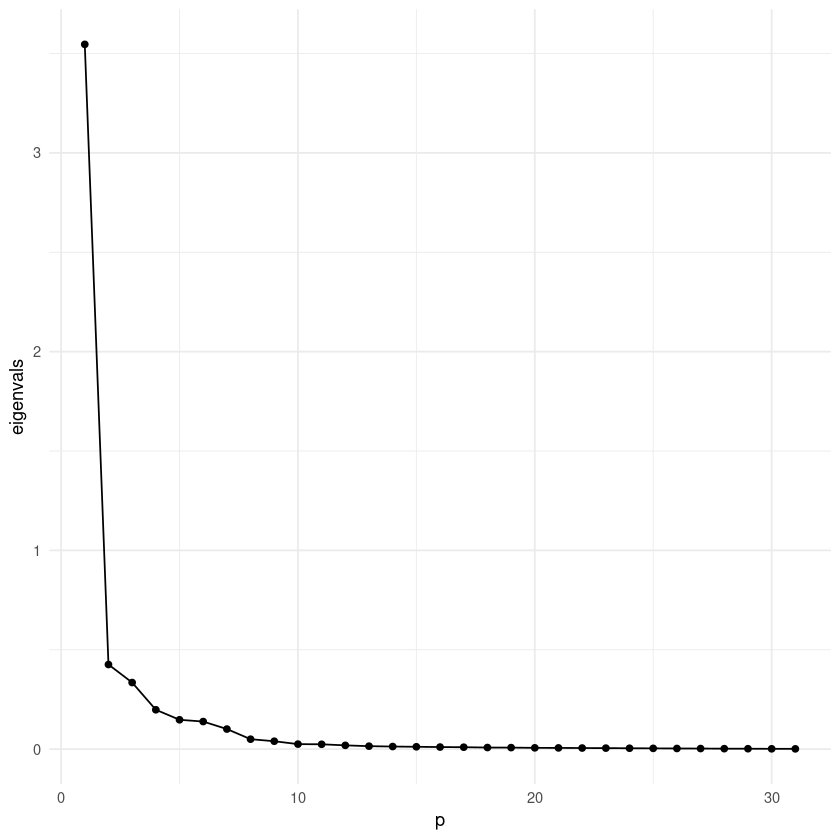

In [11]:
elbow_dat <- data.frame(p = 1:31, eigenvals = specdecomp$values)
elbow_epca_ds <- ggplot(aes(x = p, y = eigenvals), data = elbow_dat) +
geom_line() + 
geom_point () + 
theme_minimal()

ggsave("elbow_epca_ds.pdf", elbow_epca_ds)
elbow_epca_ds

Saving 6.67 x 6.67 in image


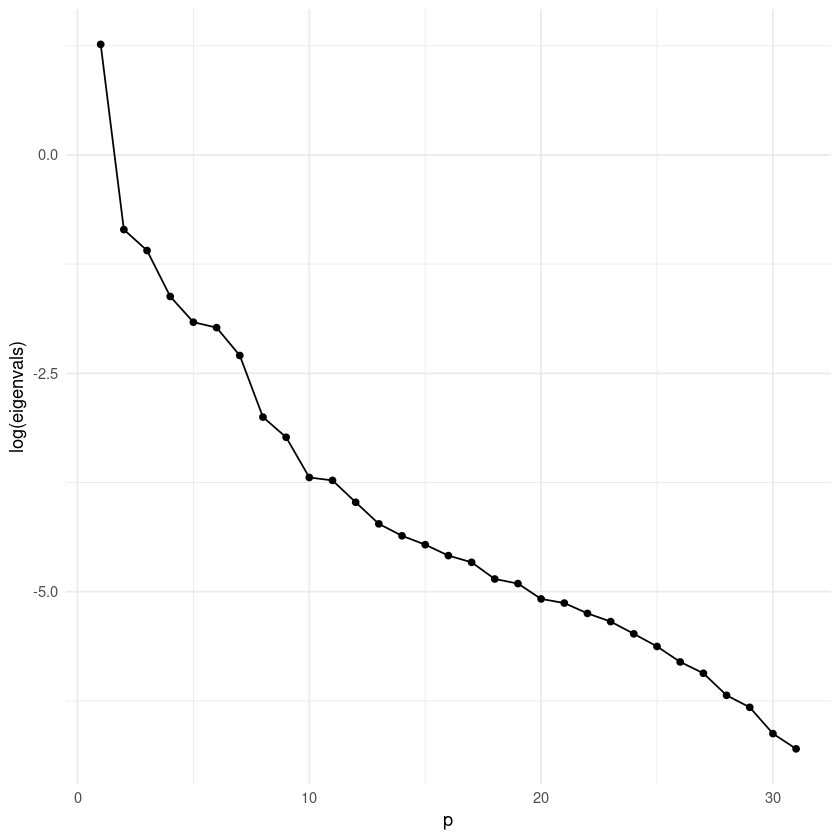

In [12]:
elbow_epca_ds_log <- ggplot(aes(x = p, y = log(eigenvals)), data = elbow_dat) +
geom_line() + 
geom_point () + 
theme_minimal()

ggsave("elbow_log_epca_ds.pdf", elbow_epca_ds_log)
elbow_epca_ds_log

#### Test if using Pareto or Fréchet margins makes a big difference

In [13]:
Xspheref <- t(apply(transform_unitfrechet(Xtrafo), 1, function(z) z / max(z)))
Xspheref <- Xspheref[which(apply(transform_unitfrechet(Xtrafo), 1, max) > 10), ]

In [14]:
specdecompf <- eigen(t(Xspheref) %*% Xspheref / 117)
specdecompf

eigen() decomposition
$values
 [1] 3.254741160 0.443954821 0.347345361 0.205222343 0.151160607 0.143341545
 [7] 0.103789913 0.050723823 0.039866705 0.025274258 0.024252668 0.019018717
[13] 0.015078583 0.013056477 0.011839301 0.010256677 0.009527994 0.007957954
[19] 0.007444698 0.006293042 0.006171491 0.005431503 0.004911635 0.004210962
[25] 0.003712815 0.003083649 0.002757121 0.002113643 0.001835733 0.001372455
[31] 0.001128546

$vectors
            [,1]         [,2]         [,3]         [,4]         [,5]
 [1,] -0.1811688  0.093919045  0.075195692 -0.001821816  0.142728763
 [2,] -0.1729962 -0.086163308 -0.074478604  0.072026911  0.154088672
 [3,] -0.1731497 -0.135382276 -0.054124134 -0.032160072  0.111214339
 [4,] -0.1734208 -0.150069470 -0.068253932 -0.059159755  0.115344145
 [5,] -0.1816326 -0.101777278 -0.182812349 -0.037783665  0.109299085
 [6,] -0.1798033 -0.088621363 -0.185216707 -0.038473193  0.090948509
 [7,] -0.1838480 -0.085306643 -0.183422288 -0.046963187  0.087235665
 [8,] 

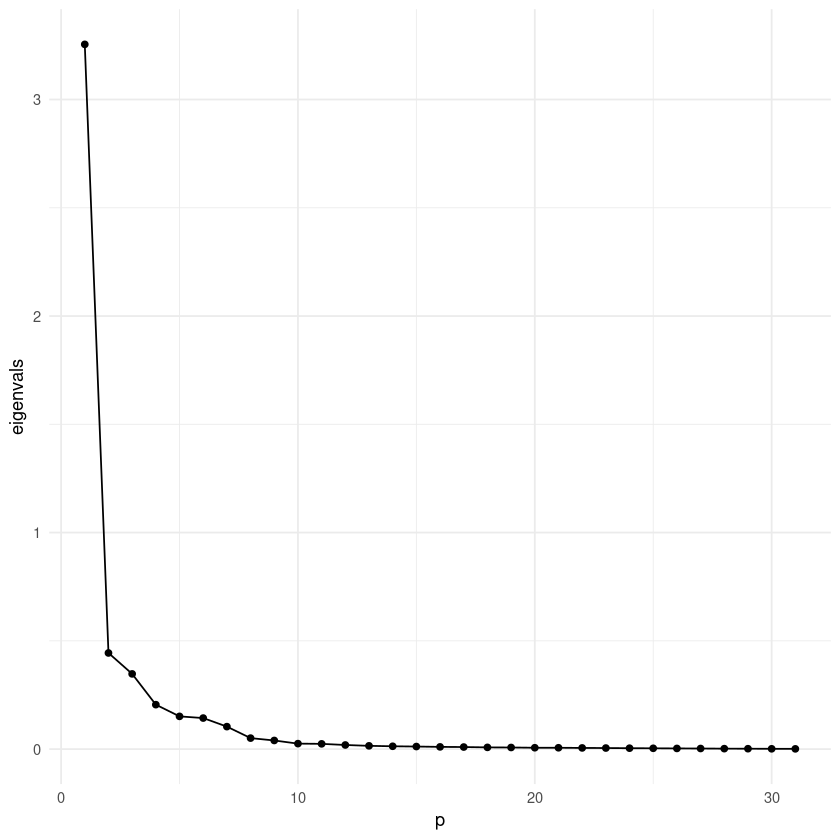

In [15]:
elbow_datf <- data.frame(p = 1:31, eigenvals = specdecompf$values)
elbow_epcaf_ds <- ggplot(aes(x = p, y = eigenvals), data = elbow_datf) +
geom_line() + 
geom_point () + 
theme_minimal()

elbow_epcaf_ds

We claim that the results are comparable, since:

In [16]:
sum(abs(specdecomp$values - specdecompf$values))

[1] 0.3462419

### Some visualizations

In [17]:
donau_iller <- 1:12
lech <- 20:22
naab <- 23:24
regen <- 25:27
isar <- 14:19
inn <- c(13, 28:31)

danube$info$arm <- NA
danube$info$arm[donau_iller] <- "arm1"
danube$info$arm[lech] <- "arm2"
danube$info$arm[naab] <- "arm3"
danube$info$arm[regen] <- "arm4"
danube$info$arm[isar] <- "arm5"
danube$info$arm[inn] <- "arm6"

In [18]:
arm1 = transform_unitfrechet(apply(Xtrafo[,donau_iller], 1, max))
arm2 = transform_unitfrechet(apply(Xtrafo[, lech], 1, max))
arm3 = transform_unitfrechet(apply(Xtrafo[, naab], 1, max))
arm4 = transform_unitfrechet(apply(Xtrafo[, regen], 1, max))
arm5 = transform_unitfrechet(apply(Xtrafo[, isar], 1, max))
arm6 = transform_unitfrechet(apply(Xtrafo[, inn], 1, max))

dat_plot_riverarm_max <- data.frame(
    arm1 = arm1, 
    arm2 = arm2, 
    arm3 = arm3, 
    arm4 = arm4, 
    arm5 = arm5, 
    arm6 = arm6
)


### plot the river arms for better data presentation

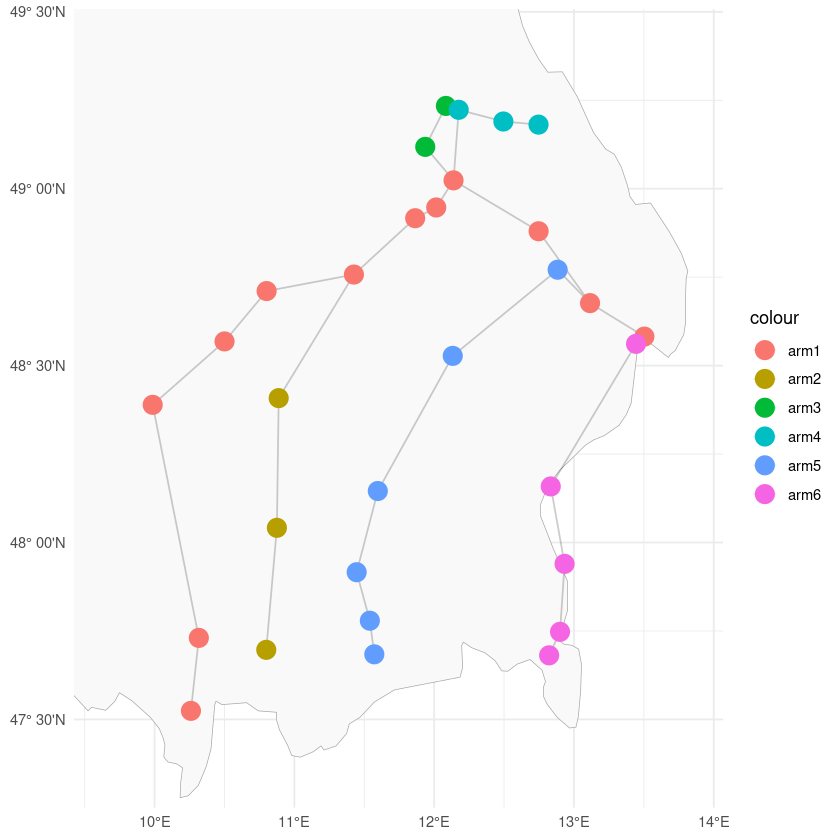

In [19]:
p <- graphicalExtremes::plotDanube(returnGGPlot = T)

pdanube_arms <- p + geom_point(aes(x = Long, y = Lat, color = arm), data = danube$info, size = 5) + theme_minimal()
pdanube_arms

In [20]:
ggsave("arms_danube.pdf", pdanube_arms, width = 12, height = 12, dpi = 320)

### Create plots of the extremal principal components

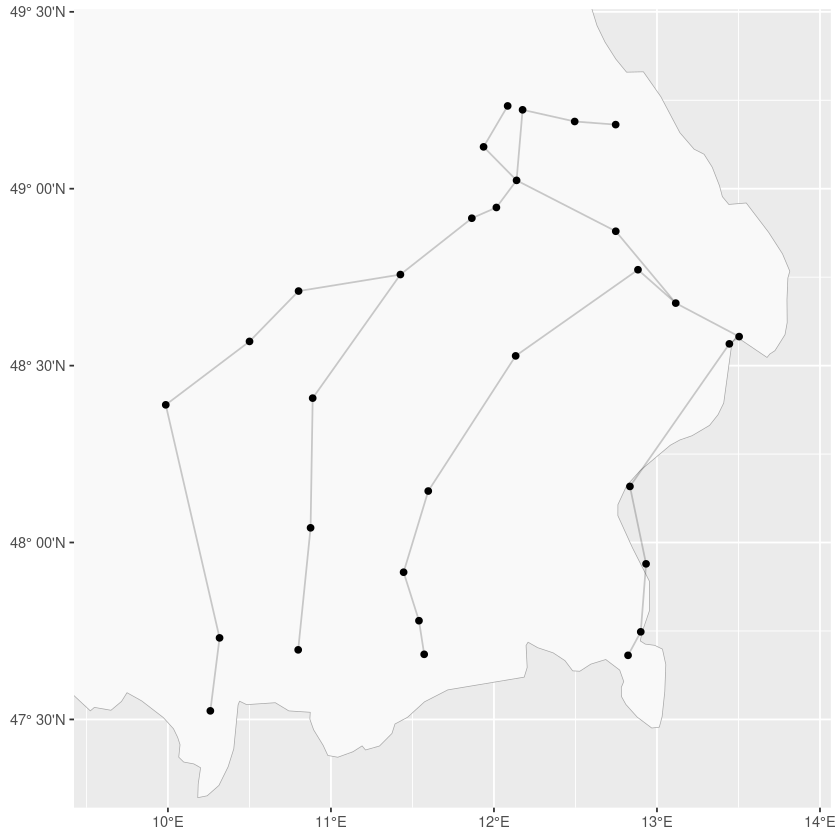

In [21]:
p <- graphicalExtremes::plotDanube(returnGGPlot = T)
p

In [22]:
enc <- specdecomp$vectors
enc <- data.frame(enc)
names(enc) <- paste0("PC", 1:31)
enc$lat <- danube$info$Lat
enc$lon <- danube$info$Long

Saving 6.67 x 6.67 in image


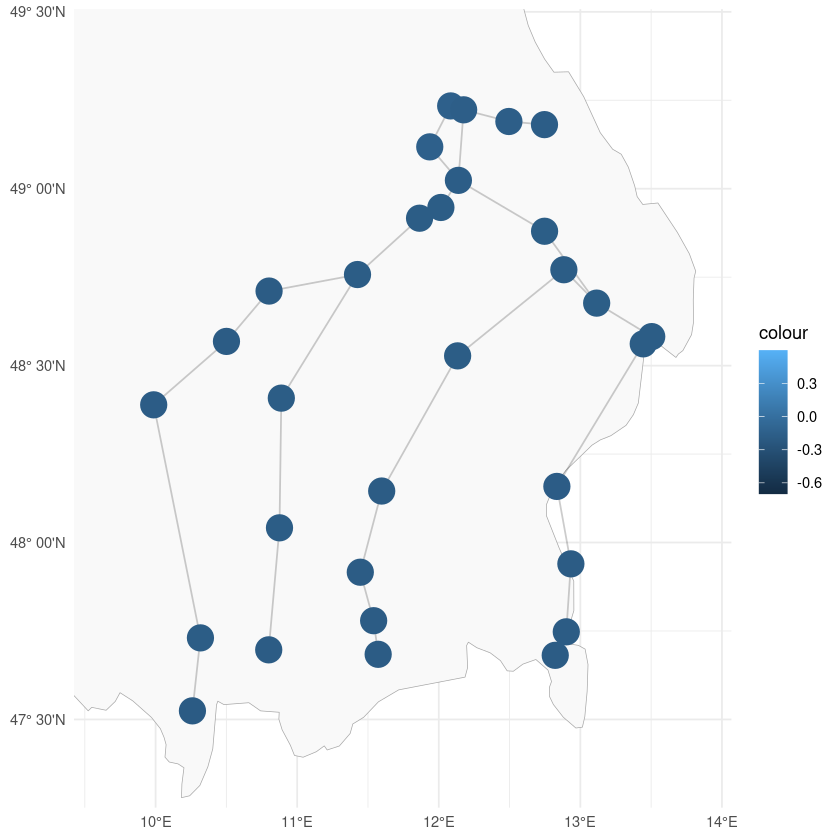

In [23]:
pc1_ds <- p + geom_point(aes(x = lon, y = lat, color = PC1), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc1_ds.pdf", pc1_ds)
pc1_ds

Saving 6.67 x 6.67 in image


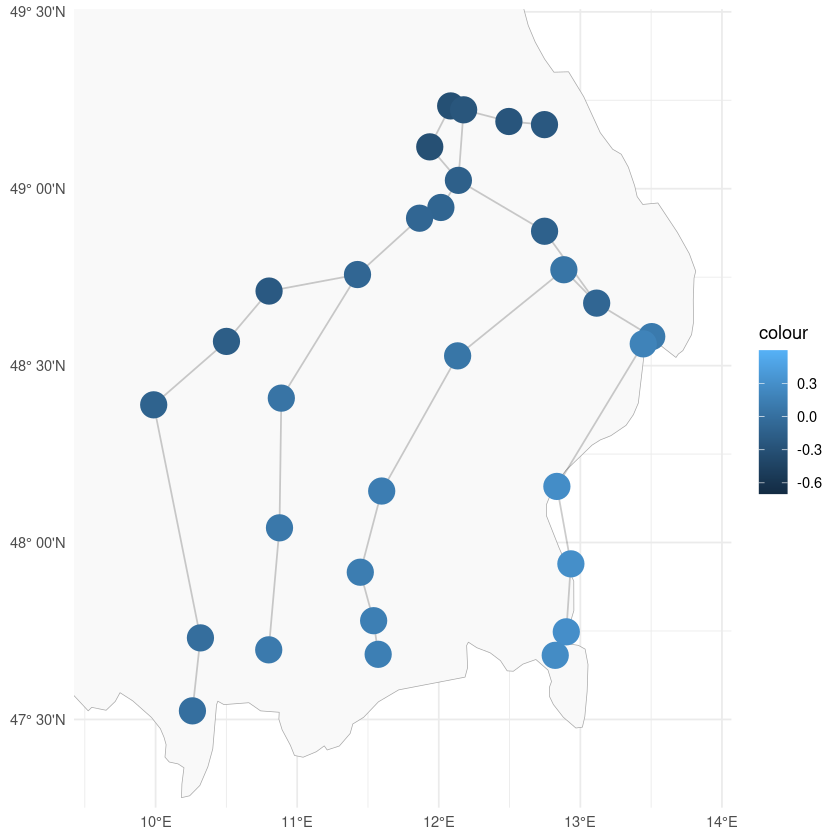

In [24]:
pc2_ds <- p + geom_point(aes(x = lon, y = lat, color = PC2), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc2_ds.pdf", pc2_ds)
pc2_ds

Saving 6.67 x 6.67 in image


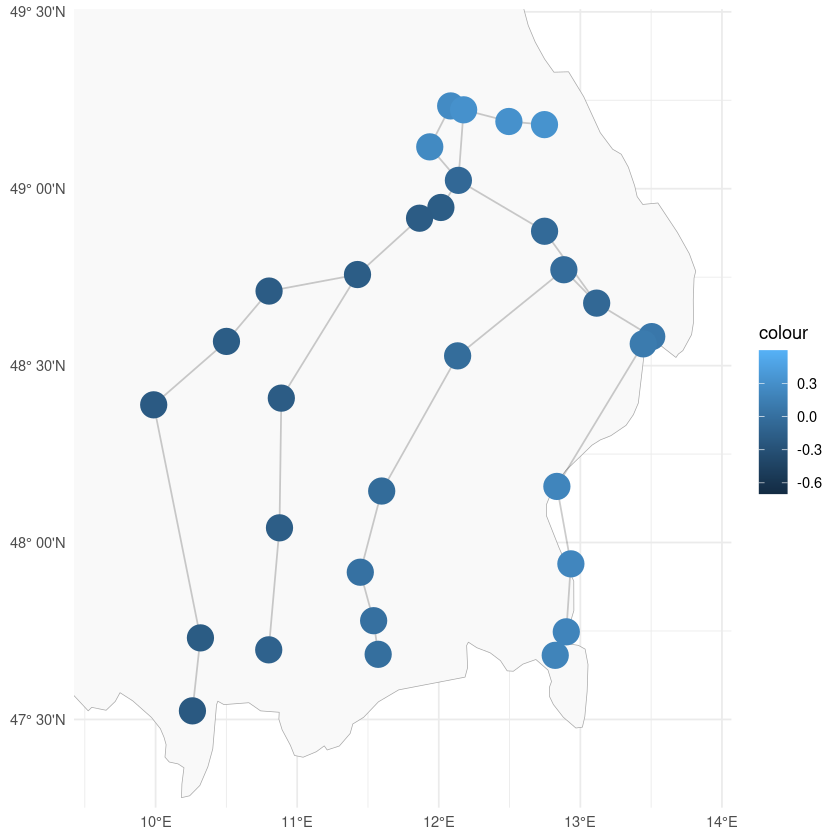

In [25]:
pc3_ds <- p + geom_point(aes(x = lon, y = lat, color = PC3), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc3_ds.pdf", pc3_ds)
pc3_ds

Saving 6.67 x 6.67 in image


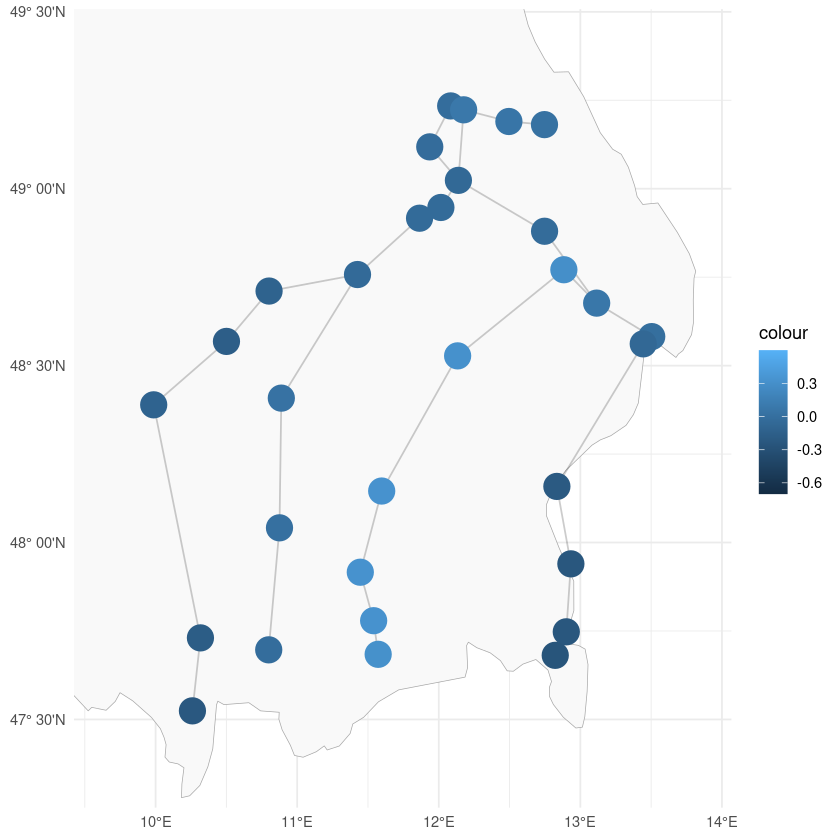

In [26]:
pc4_ds <- p + geom_point(aes(x = lon, y = lat, color = PC4), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc4_ds.pdf", pc4_ds)
pc4_ds

Saving 6.67 x 6.67 in image


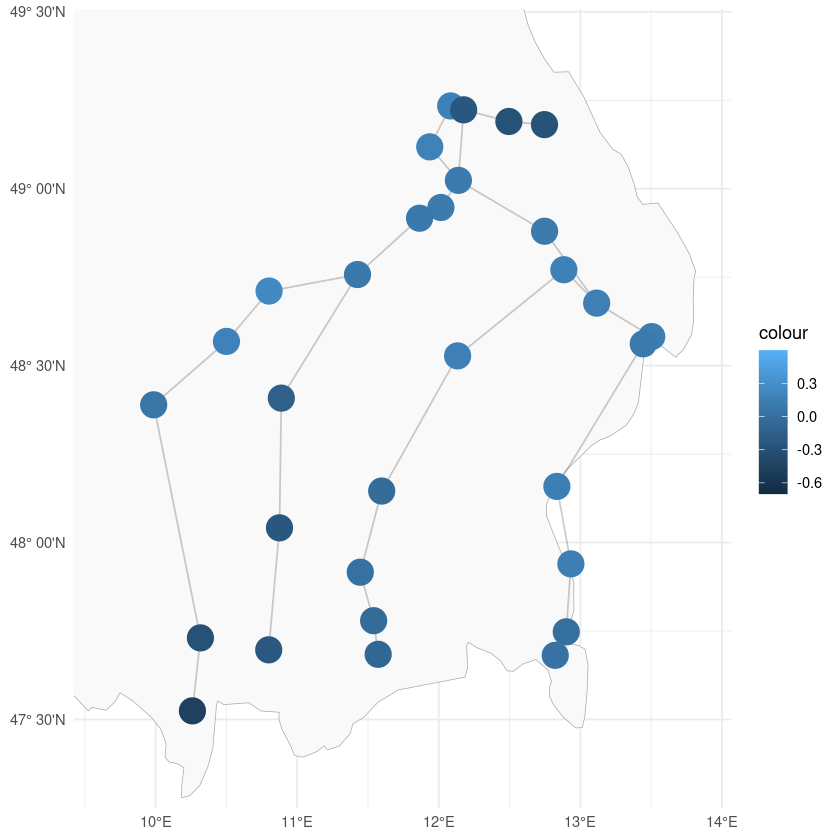

In [27]:
pc5_ds <- p + geom_point(aes(x = lon, y = lat, color = PC5), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc5_ds.pdf", pc5_ds)

pc5_ds

Saving 6.67 x 6.67 in image


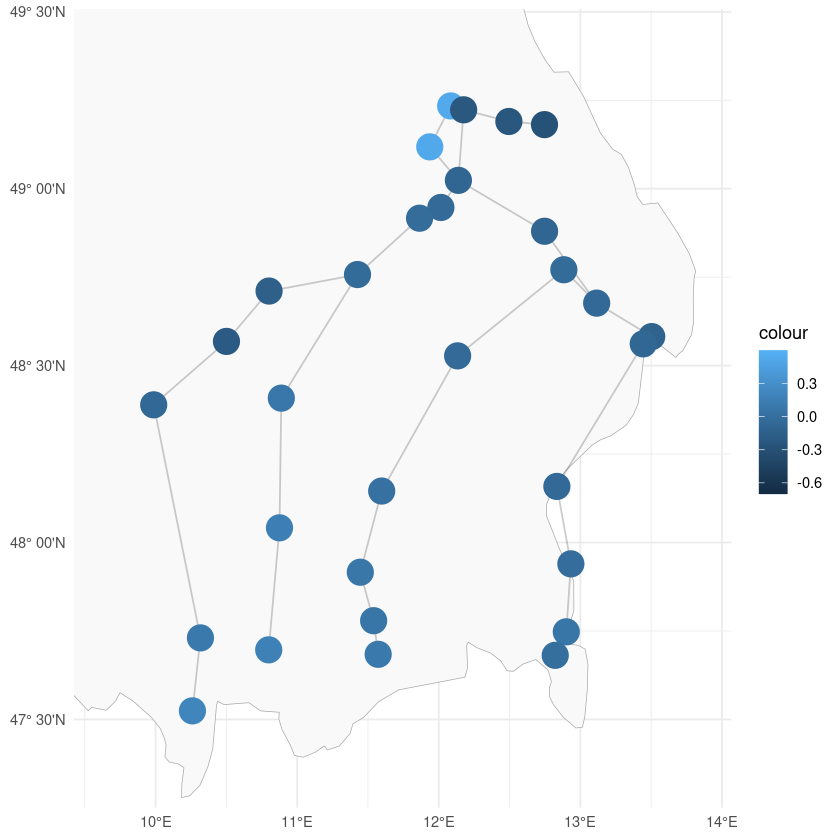

In [28]:
pc6_ds <- p + geom_point(aes(x = lon, y = lat, color = PC6), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7,0.6))

ggsave("danube_pc6_ds.pdf", pc6_ds)
pc6_ds

In [29]:
rec <- Xtrafo %*% specdecomp$vectors[,1:6] %*% t(specdecomp$vectors[,1:6])
ds_rec_dat <- data.frame(rec)
ds_rec_dat <- full_join(data.frame(Xtrafo), ds_rec_dat)
ds_rec_dat$is_rec <- c(rep(F, dim(rec)[1]), rep(T, dim(rec)[1]))

Joining with `by = join_by(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12,
X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28,
X29, X30, X31)`


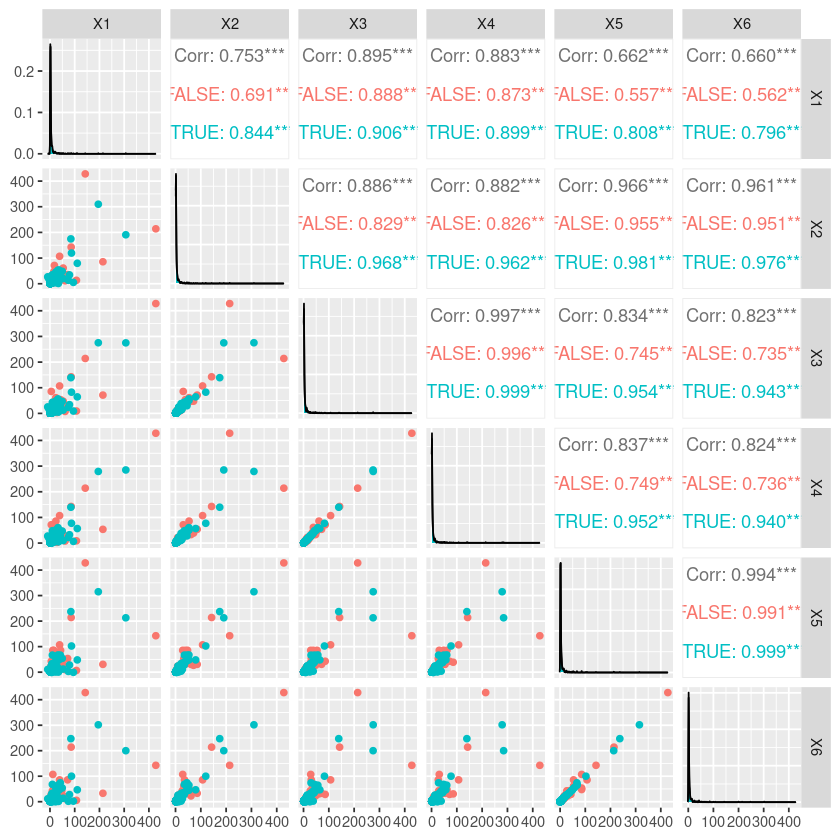

In [30]:
ggpairs(ds_rec_dat, columns = 1:6, aes(color = is_rec))

# Cooley Thibaud PCA for extremes 

In [31]:
# Tail pairwise dependence matrix code by Yiang 

decls <- function(x, th, k) {
    ## Ordinary decluster.
    id.big <- which(x > th)
    id.dif <- diff(id.big)
    tick <- which(id.dif >= k)
    start <- id.big[c(1, tick + 1)]              # Where a new cluster begins
    end <- c(id.big[tick], last(id.big, 1))
    n <- length(start)
    id.res <- rep(0, n)
    for ( i in 1 : n) {
        temp <- x[start[i] : end[i]]
        id.res[i] <- which(temp == max(temp, na.rm = TRUE))[1] + start[i] - 1
    }
    id.res
}

rw.Sigma <- function(X, u = 0.98, decluster = F) {
    ## Compute TPDM
    P <- ncol(X)                      # Number of stations
    M <- nrow(X)                      # Number of obs
    Sigma <- matrix(0, P, P)
    for ( i in 1 : P) {
        if (i %% 5 == 0) print(i)
        for ( j in 1 : P) {
            r <- sqrt(X[, i] ^ 2 + X[, j] ^ 2)
            w1 <- X[, i] / r
            w2 <- X[, j] / r
            th <- quantile(r, u, na.rm = TRUE)
            if(decluster) {
                id <- decls(r, th, 5)
            } else {
                id <- which(r > th)
            } 
            Sigma[i, j] <- sum(w1[id] * w2[id], na.rm = TRUE) / (length(id)) * 2
        }
    }
    Sigma
}

rw.Sigma.full <- function(X, u = 0.98, decluster = F) {
    ## Compute TPDM
    P <- ncol(X)                      # Number of stations
    M <- nrow(X)                      # Number of obs
    Sigma <- matrix(0, P, P)
    for ( i in 1 : P) {
        if (i %% 5 == 0) print(i)
        for ( j in 1 : P) {
            r <- sqrt(X[, i] ^ 2 + X[, j] ^ 2)
            w1 <- X[, i] / r
            w2 <- X[, j] / r
            th <- quantile(r, u, na.rm = TRUE)
            if(decluster) {
                id <- decls(r, th, 5)
            } else {
                id <- which(r > th)
            } 
            Sigma[i, j] <- sum(w1[id] * w2[id], na.rm = TRUE) / (length(id)) * 2
        }
    }
    Sigma
}


##applies the transformation t
trans <- function(x)
{
    ##because it takes an exponential, this function flakes out if x is too big
    ##hence for big values of x, we return x
    v <- log(1 + exp(x))
    id <- which(x < -20)
    v[!is.finite(v)] <- x[!is.finite(v)]
    v[id] <- exp(x[id])
    return(v)
}

##applies the inverse transformation t^{-1}
invTrans <- function(v)
{
    ##same trickeration for big values of v
    ##still returns -Inf if v is machine zero
    x <- log(exp(v) - 1)
    x[!is.finite(x) & v > 1 & !is.na(x)] <- v[!is.finite(x) & v > 1 &
                                                  !is.na(x)]

    return(x)
}

In [32]:
# use a multiplicatively rescaled estimator to ensure that the ecdf does not take the values 0 and 1.
ecdf_shifted <- function(z) length(z) / (length(z) + 1) * ecdf(z)(z)

In [33]:
summary(ecdf_shifted(Xtrafo))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002035 0.250659 0.501243 0.501167 0.751526 0.999925 

In [34]:
# Transform data to approximately 2-Fréchet margins 
Xtrafo_2frech <- apply(Xtrafo, 2, function(z) 1 / sqrt(-log(ecdf_shifted(z))))

In [35]:
X2sphere <- t(apply(Xtrafo_2frech, 1, function(z) z / sqrt(sum(z^2))))
rownorms <- apply(Xtrafo_2frech, 1, function(z) sqrt(sum(z^2)))

# for threshold = 10 we have roughly the same number of observations exceeding the threshold as for the other procedure
X2sphere_extr <- X2sphere[which(rownorms > 10), ]
tpdm <- t(X2sphere_extr) %*% X2sphere_extr / 117

In [36]:
summary(rownorms)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.632   5.394   7.292  10.169  11.092  84.221 

In [37]:
length(which(rownorms > 10))

[1] 127

In [38]:
tpdm

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
X1,0.03282009,0.03032523,0.02980767,0.02981567,0.02990579,0.02988417,0.02990225,0.02924262,0.02940045,0.02929008,⋯,0.03012978,0.02818603,0.02767909,0.02846393,0.02836167,0.02932928,0.03180240,0.03186744,0.03189962,0.03180214
X2,0.03032523,0.03179131,0.03151892,0.03162105,0.03163362,0.03155852,0.03157626,0.03167716,0.03141241,0.03109178,⋯,0.02958624,0.03018174,0.02998877,0.02917398,0.02907174,0.02918677,0.02880002,0.02885989,0.02808362,0.02824407
X3,0.02980767,0.03151892,0.03190873,0.03200589,0.03179790,0.03164269,0.03173272,0.03218265,0.03181491,0.03141360,⋯,0.02933936,0.03098214,0.03071104,0.02963649,0.02954460,0.02959394,0.02843044,0.02852685,0.02757154,0.02778485
X4,0.02981567,0.03162105,0.03200589,0.03237677,0.03215797,0.03196031,0.03204145,0.03272542,0.03233908,0.03190129,⋯,0.02949731,0.03129346,0.03093210,0.02974347,0.02967359,0.02973402,0.02851226,0.02854190,0.02754375,0.02777697
X5,0.02990579,0.03163362,0.03179790,0.03215797,0.03287285,0.03273358,0.03275038,0.03312124,0.03283433,0.03250818,⋯,0.03046863,0.02967663,0.02925565,0.02822002,0.02819441,0.02833944,0.02883215,0.02880993,0.02775734,0.02797858
X6,0.02988417,0.03155852,0.03164269,0.03196031,0.03273358,0.03283716,0.03279372,0.03306803,0.03288576,0.03261157,⋯,0.03072123,0.02939471,0.02901306,0.02803302,0.02797809,0.02812679,0.02902849,0.02896683,0.02789580,0.02814952
X7,0.02990225,0.03157626,0.03173272,0.03204145,0.03275038,0.03279372,0.03302322,0.03324041,0.03297347,0.03269583,⋯,0.03071989,0.02939058,0.02901839,0.02817725,0.02814071,0.02823949,0.02923074,0.02916251,0.02808975,0.02837231
X8,0.02924262,0.03167716,0.03218265,0.03272542,0.03312124,0.03306803,0.03324041,0.03542726,0.03471297,0.03401652,⋯,0.02886966,0.03107376,0.03066401,0.02894183,0.02887692,0.02884465,0.02864381,0.02865131,0.02754025,0.02781210
X9,0.02940045,0.03141241,0.03181491,0.03233908,0.03283433,0.03288576,0.03297347,0.03471297,0.03481662,0.03410530,⋯,0.02935553,0.02990755,0.02958168,0.02862709,0.02856495,0.02875343,0.02895763,0.02906351,0.02783380,0.02808438
X10,0.02929008,0.03109178,0.03141360,0.03190129,0.03250818,0.03261157,0.03269583,0.03401652,0.03410530,0.03429445,⋯,0.02980810,0.02915954,0.02892956,0.02818482,0.02815789,0.02829394,0.02925336,0.02927512,0.02782916,0.02813151


In [39]:
specdecomp_cy <- eigen(tpdm)
if(specdecomp_cy$vectors[1,1] < 0) specdecomp_cy$vectors[,1] <- -specdecomp_cy$vectors[,1] 

In [40]:
specdecomp_cy

eigen() decomposition
$values
 [1] 9.341061e-01 4.987414e-02 3.516851e-02 1.647157e-02 1.394161e-02
 [6] 1.068885e-02 8.084772e-03 3.858395e-03 2.616614e-03 1.590719e-03
[11] 1.298067e-03 1.282897e-03 9.630097e-04 7.582129e-04 7.119605e-04
[16] 5.920410e-04 4.906681e-04 4.673907e-04 3.841345e-04 3.283111e-04
[21] 2.780862e-04 2.549013e-04 2.479708e-04 2.106955e-04 1.753286e-04
[26] 1.621996e-04 1.253773e-04 1.174854e-04 8.950573e-05 6.682220e-05
[31] 6.378434e-05

$vectors
           [,1]        [,2]        [,3]         [,4]         [,5]         [,6]
 [1,] 0.1799304  0.08824804  0.09494392 -0.013475271  0.113388857 -0.138626912
 [2,] 0.1801830 -0.07827631 -0.07127995 -0.059398064  0.113548536 -0.148283636
 [3,] 0.1797080 -0.12445285 -0.07804981 -0.007053645  0.032281368 -0.140494351
 [4,] 0.1808875 -0.13389666 -0.09658900  0.012451608  0.007521556 -0.138918067
 [5,] 0.1817528 -0.07294009 -0.18580301  0.041894938  0.012938684 -0.129899462
 [6,] 0.1819475 -0.05775141 -0.19316297  0.04682

Saving 6.67 x 6.67 in image


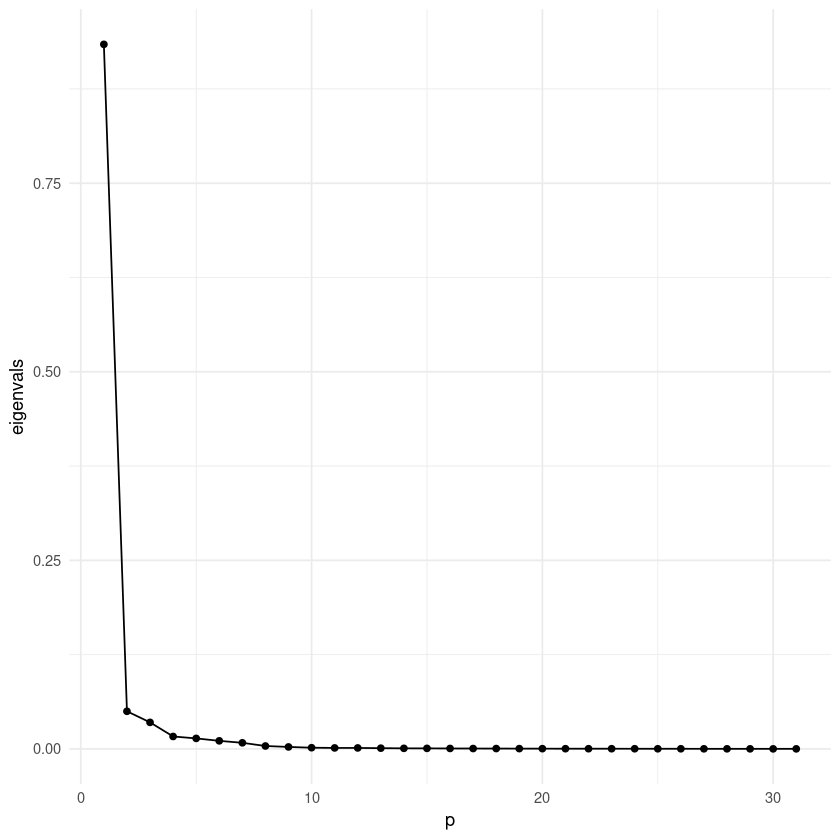

In [41]:
plot_errs_cy <- data.frame(p = 1:31, eigenvals = specdecomp_cy$values)

elbow_dat_cy <- data.frame(p = 1:31, eigenvals = specdecomp_cy$values[1:31])
elbow_cy <- ggplot(aes(x = p, y = eigenvals), data = elbow_dat_cy) +
geom_line() + 
geom_point () + 
theme_minimal()

ggsave("elbow_epca_cy.pdf", elbow_cy)
elbow_cy

Saving 6.67 x 6.67 in image


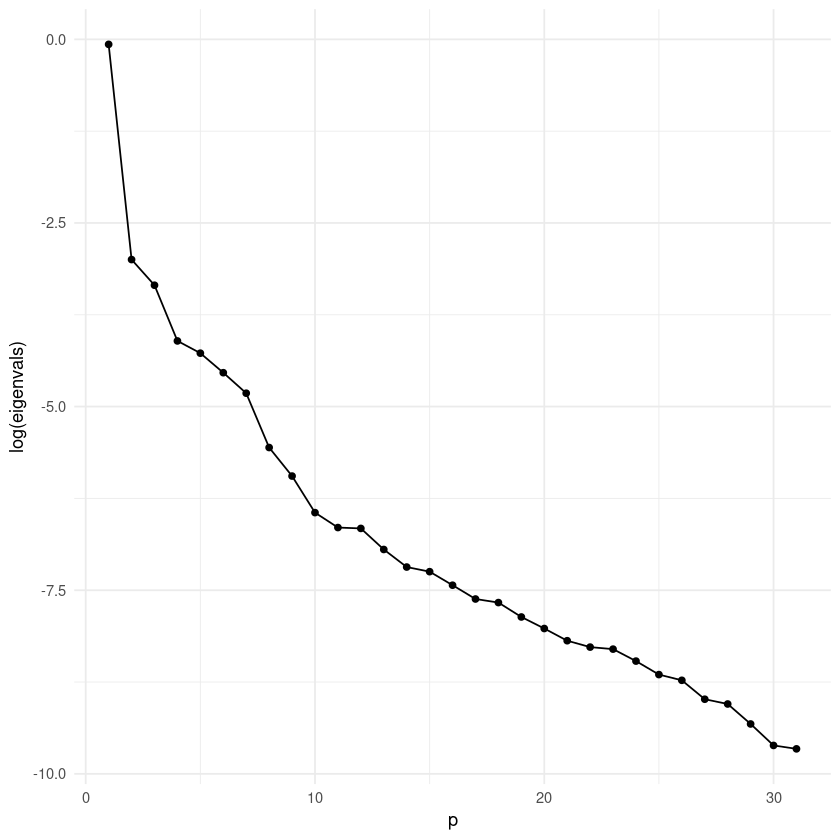

In [42]:
plot_errs_cy <- data.frame(p = 1:31, eigenvals = specdecomp_cy$values)

elbow_dat_cy <- data.frame(p = 1:31, eigenvals = specdecomp_cy$values[1:31])
elbow_cy <- ggplot(aes(x = p, y = log(eigenvals)), data = elbow_dat_cy) +
geom_line() + 
geom_point () + 
theme_minimal()

ggsave("elbow_log_epca_cy.pdf", elbow_cy)
elbow_cy

In [43]:
enc_cy <- specdecomp_cy$vectors
enc_cy <- data.frame(enc_cy)
names(enc_cy) <- paste0("PC", 1:31)
enc_cy$lat <- danube$info$Lat
enc_cy$lon <- danube$info$Long

Saving 6.67 x 6.67 in image


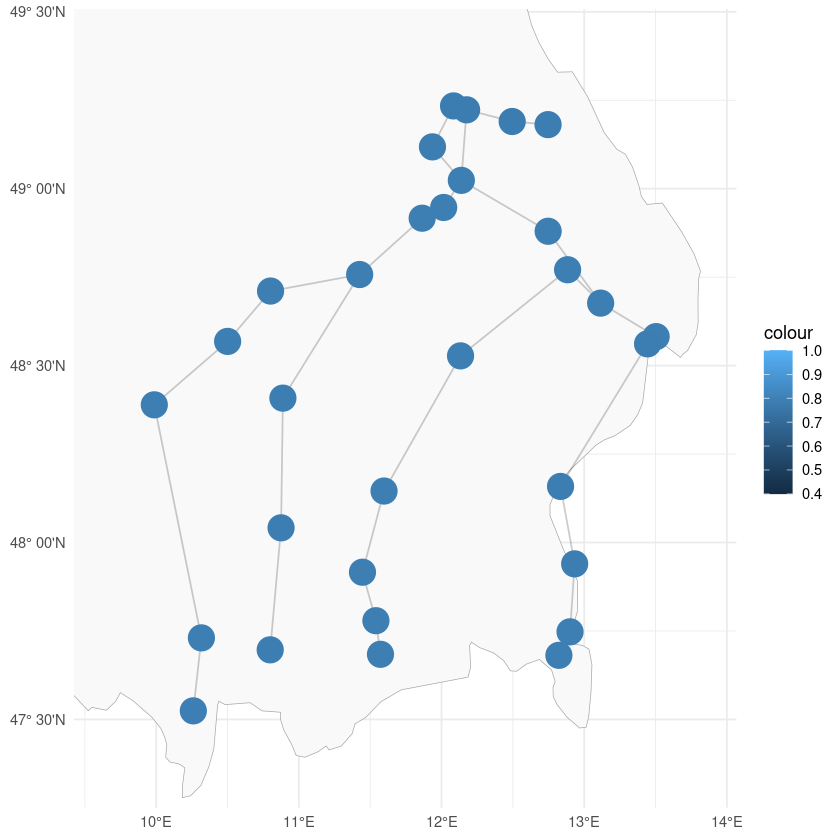

In [44]:
pc1_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC1)), size = 7, data = enc_cy) +
theme_minimal() + 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc1_cy.pdf", pc1_cy)
pc1_cy

Saving 6.67 x 6.67 in image


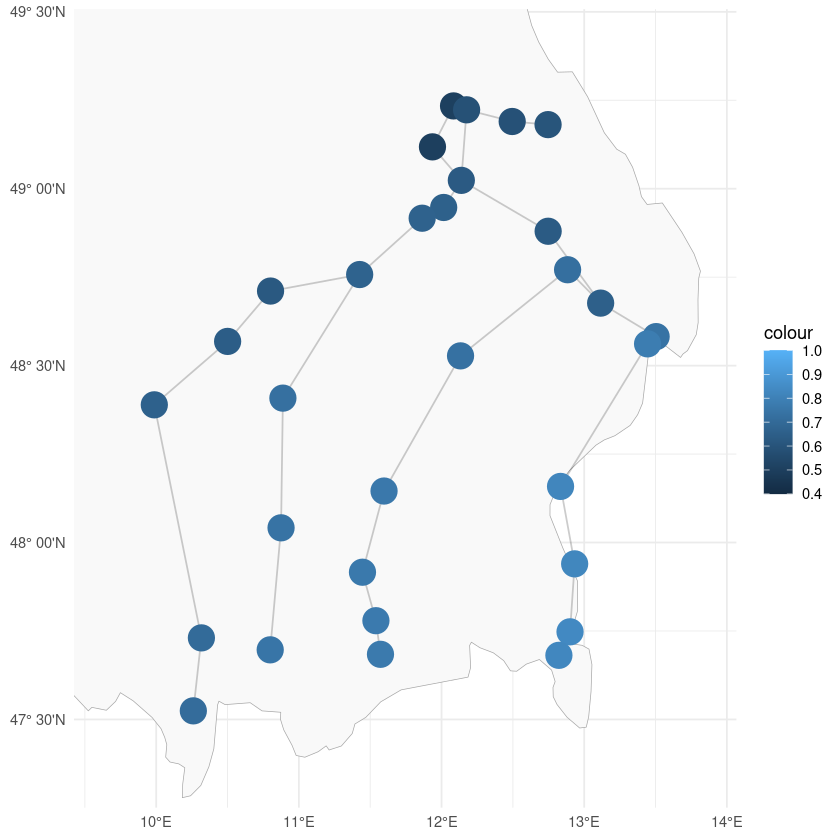

In [45]:
pc2_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC2)), size = 7, data = enc_cy) +
theme_minimal()+ 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc2_cy.pdf", pc2_cy)
pc2_cy

Saving 6.67 x 6.67 in image


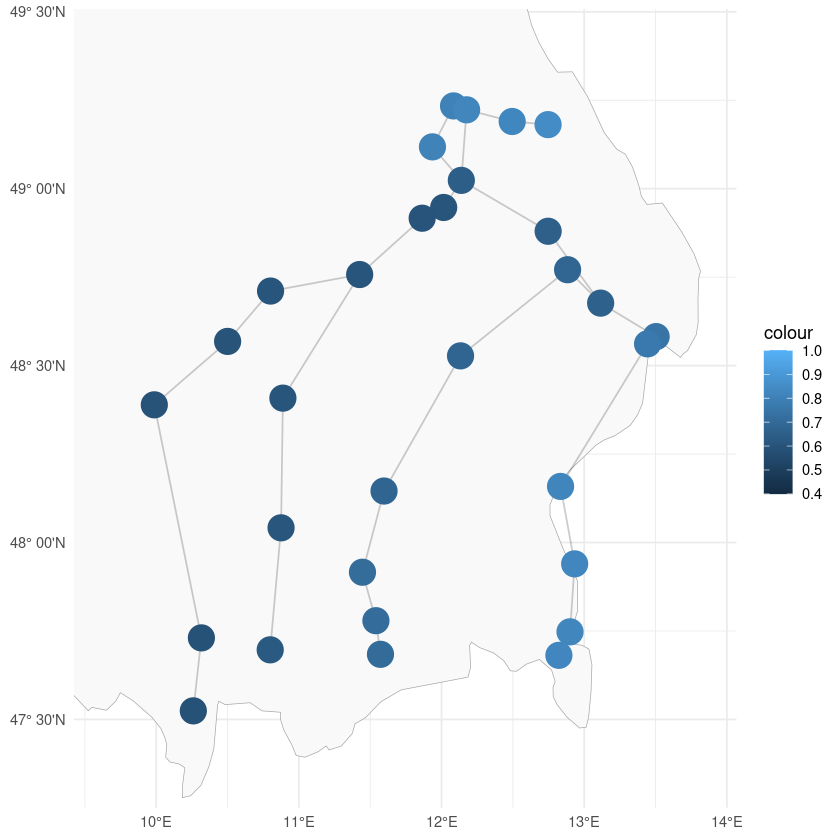

In [46]:
pc3_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC3)), size = 7, data = enc_cy) +
theme_minimal()+ 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc3_cy.pdf", pc3_cy)
pc3_cy

Saving 6.67 x 6.67 in image


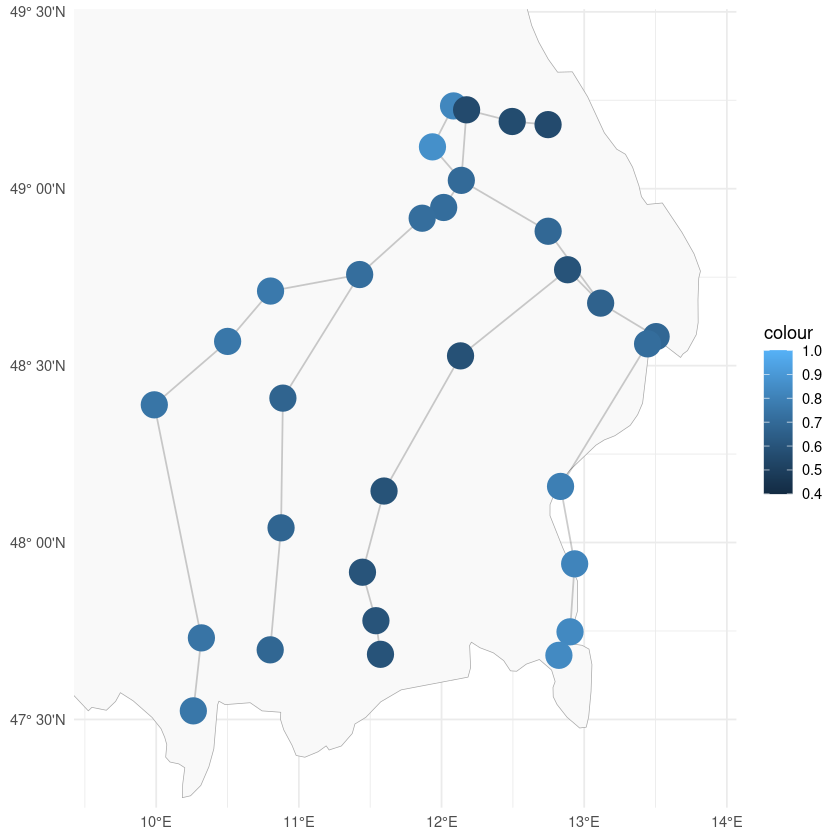

In [47]:
pc4_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC4)), size = 7, data = enc_cy) +
theme_minimal()+ 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc4_cy.pdf", pc4_cy)
pc4_cy

Saving 6.67 x 6.67 in image


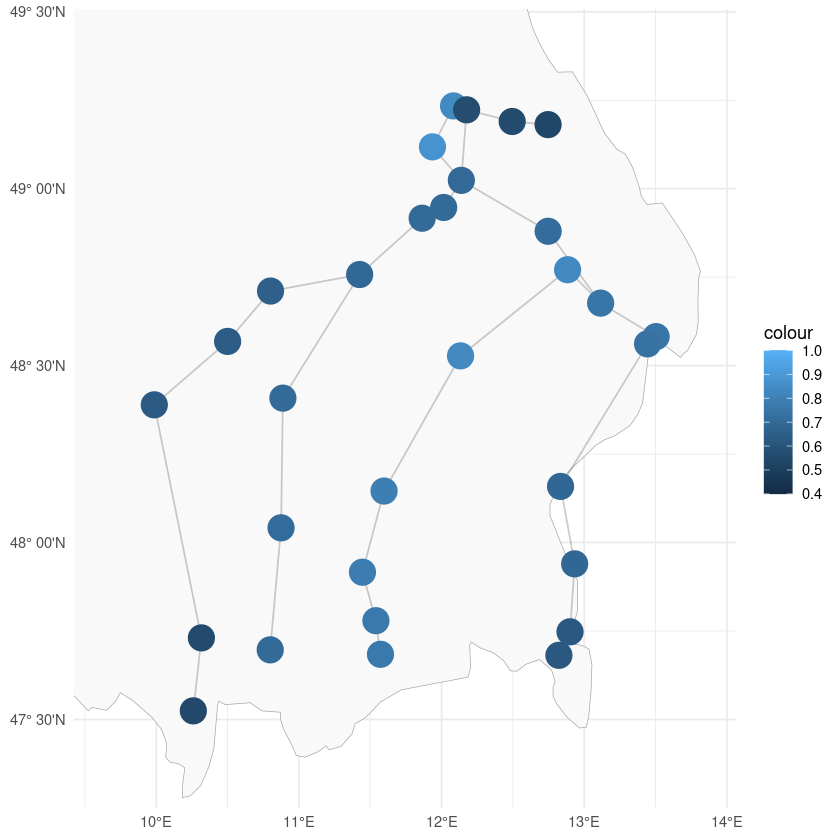

In [48]:
pc5_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC5)), size = 7, data = enc_cy) +
theme_minimal() + 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc5_cy.pdf", pc5_cy)
pc5_cy

Saving 6.67 x 6.67 in image


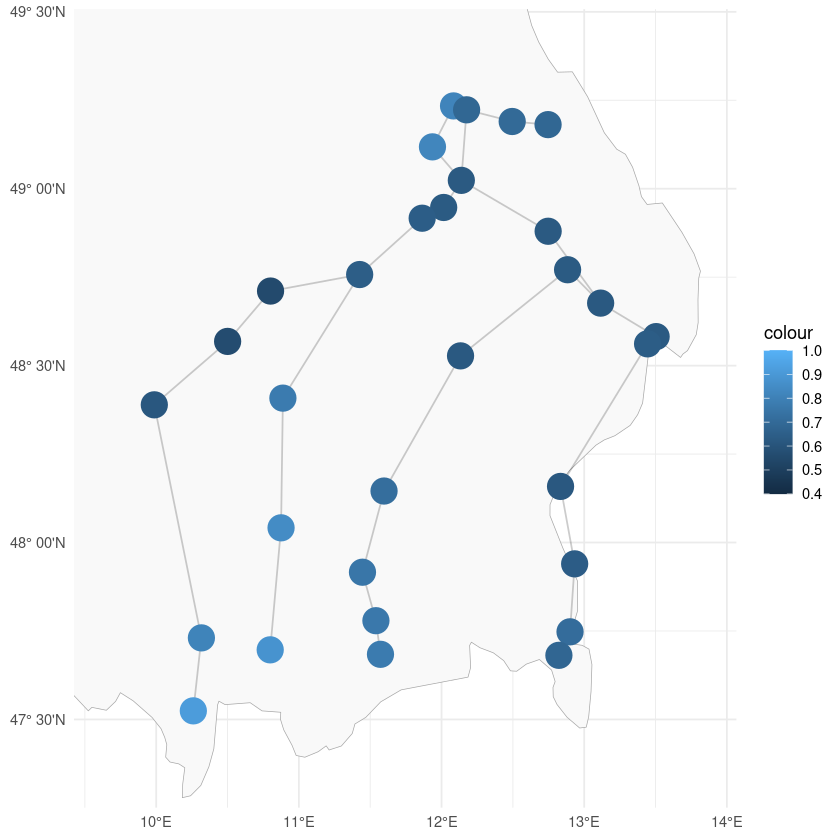

In [49]:
pc6_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC6)), size = 7, data = enc_cy) +
theme_minimal() + 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc6_cy.pdf", pc6_cy)
pc6_cy

### Checking reconstructions

In [50]:
specdecomp_cy

eigen() decomposition
$values
 [1] 9.341061e-01 4.987414e-02 3.516851e-02 1.647157e-02 1.394161e-02
 [6] 1.068885e-02 8.084772e-03 3.858395e-03 2.616614e-03 1.590719e-03
[11] 1.298067e-03 1.282897e-03 9.630097e-04 7.582129e-04 7.119605e-04
[16] 5.920410e-04 4.906681e-04 4.673907e-04 3.841345e-04 3.283111e-04
[21] 2.780862e-04 2.549013e-04 2.479708e-04 2.106955e-04 1.753286e-04
[26] 1.621996e-04 1.253773e-04 1.174854e-04 8.950573e-05 6.682220e-05
[31] 6.378434e-05

$vectors
           [,1]        [,2]        [,3]         [,4]         [,5]         [,6]
 [1,] 0.1799304  0.08824804  0.09494392 -0.013475271  0.113388857 -0.138626912
 [2,] 0.1801830 -0.07827631 -0.07127995 -0.059398064  0.113548536 -0.148283636
 [3,] 0.1797080 -0.12445285 -0.07804981 -0.007053645  0.032281368 -0.140494351
 [4,] 0.1808875 -0.13389666 -0.09658900  0.012451608  0.007521556 -0.138918067
 [5,] 0.1817528 -0.07294009 -0.18580301  0.041894938  0.012938684 -0.129899462
 [6,] 0.1819475 -0.05775141 -0.19316297  0.04682

In [51]:
enc_cy <- t(specdecomp_cy$vectors[, 1:6]) %*% t(invTrans(Xtrafo_2frech))
rec_cy <- t(specdecomp_cy$vectors[, 1:6] %*% trans(enc_cy))

In [52]:
enc_cy

11.3692701,7.6822385,6.0499767,6.1078162,5.4724556,4.0110841,9.21720507,1.68338937,1.1220946,10.04688757,⋯,-0.07843350,2.10476301,36.3913530,26.549569,16.9191302,12.7564695,14.93521733,6.9687987,1.4074877,4.8667587606
4.7660442,1.3962210,2.1055583,0.8388828,2.3044403,2.4557841,1.07153940,0.05751424,0.6714189,-2.80350308,⋯,0.34025846,0.35158716,8.1202577,-5.235484,0.2117132,-2.1174806,1.20980046,-3.9533819,0.5879965,-0.0849496012
-0.8519911,-2.0442379,-0.8657645,-1.7290228,-1.3819702,0.1156532,-2.13876535,-1.26973090,-0.2184716,3.94149810,⋯,2.45315842,1.28048606,6.9358632,-10.362123,-1.7619840,-3.9350933,-0.01216671,2.2109003,2.0613158,1.1609561521
2.0243658,-1.3171854,-1.6680891,-1.5749650,-0.9806857,-1.4692933,-0.86932181,0.70338968,-0.4742050,0.04507266,⋯,-0.02998467,-0.77298230,2.1600474,-1.126006,0.9525803,0.8531325,-1.83372820,-1.9412190,0.2450461,-1.2389598199
-2.1238692,-0.2325078,-0.3864945,-0.7404145,0.4990956,0.1479574,-1.32813653,-0.54747192,-0.4044008,-2.30069854,⋯,-0.93951682,-0.32622207,0.5810564,-1.451100,-2.1007088,-0.5549898,1.36246438,-0.5242830,-0.5068281,-0.0445619573
-0.7796155,-1.0441209,0.2280894,-1.5582941,0.8510999,0.2054211,-0.04764199,-0.36163272,-0.7266419,0.65860069,⋯,-0.14911428,0.07007335,-3.4096636,-3.869672,3.2910374,-3.2665960,-0.77705673,-0.1899989,-0.4471007,0.0009464713


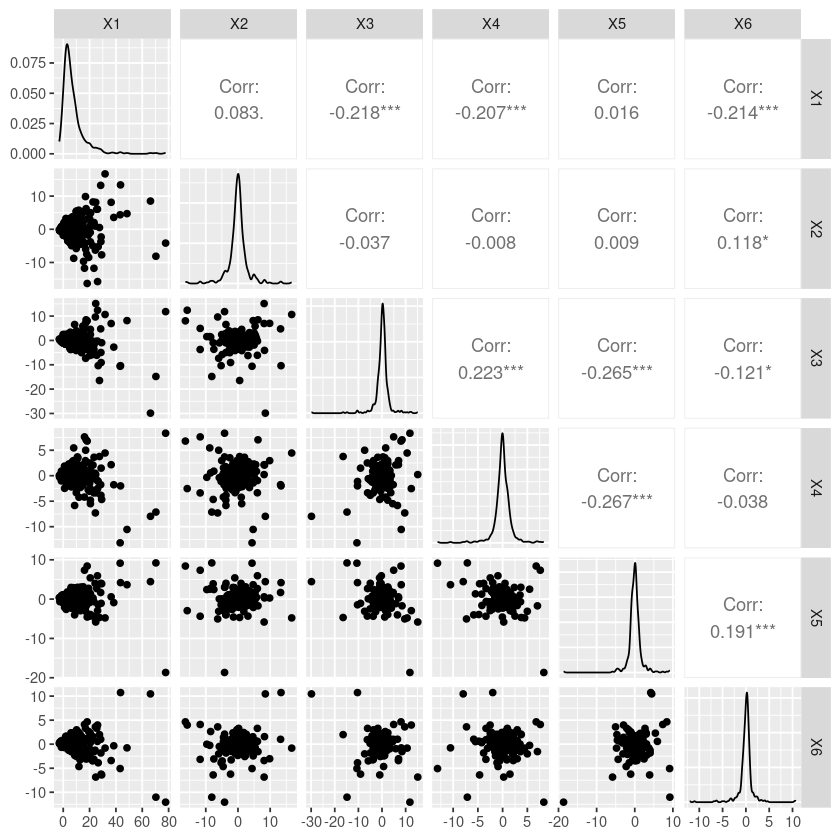

In [53]:
ggpairs(data.frame(t(enc_cy)))

In [54]:
dim(Xtrafo_2frech)

[1] 428  31

Joining with `by = join_by(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12,
X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28,
X29, X30, X31)`


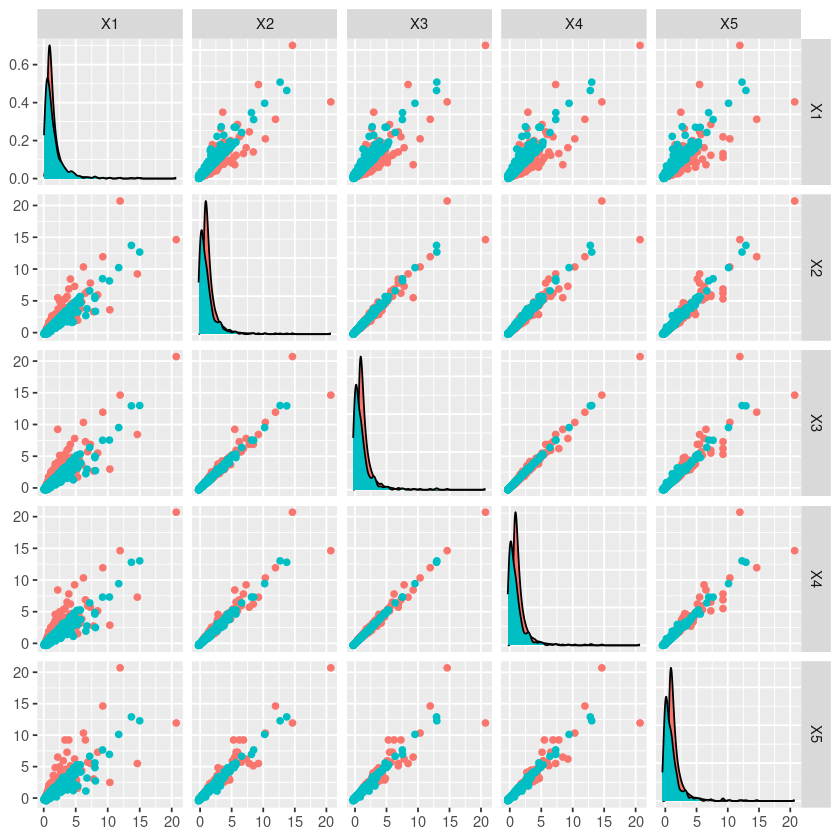

In [55]:
pairs_dat <- data.frame(Xtrafo_2frech)
tmp <- data.frame(rec_cy)
pairs_dat <- full_join(pairs_dat, tmp)
pairs_dat$is_rec <- c(rep("False", 428), rep("True", 428))

ggpairs(pairs_dat, columns = 1:5, aes(color = is_rec), upper = list(continuous = "points"))

### Apply spherical K-means to the danube dataset

In [56]:
summary(apply(Xtrafo, 1, function(z) sqrt((sum(z^2)))))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   5.656    8.780   13.820   48.460   28.331 1548.456 

In [57]:
# choosing the threshold as 25 yields roughly the same number of exceedances
sum(apply(Xtrafo, 1, function(z) sqrt((sum(z^2)))) > 25)

[1] 123

In [58]:
library(skmeans)

kmeanserrs = data.frame(k = 2:15, errs = NA)
kmeansclusterings = list()
for(k in 2:15) {
    tmp <- skmeans::skmeans(Xtrafo[which(apply(Xtrafo, 1, function(z) sqrt((sum(z^2)))) > 25), ], k = k)
    kmeansclusterings[[k]] <- tmp
    kmeanserrs[k,2] <- tmp$value
}

Saving 6.67 x 6.67 in image
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


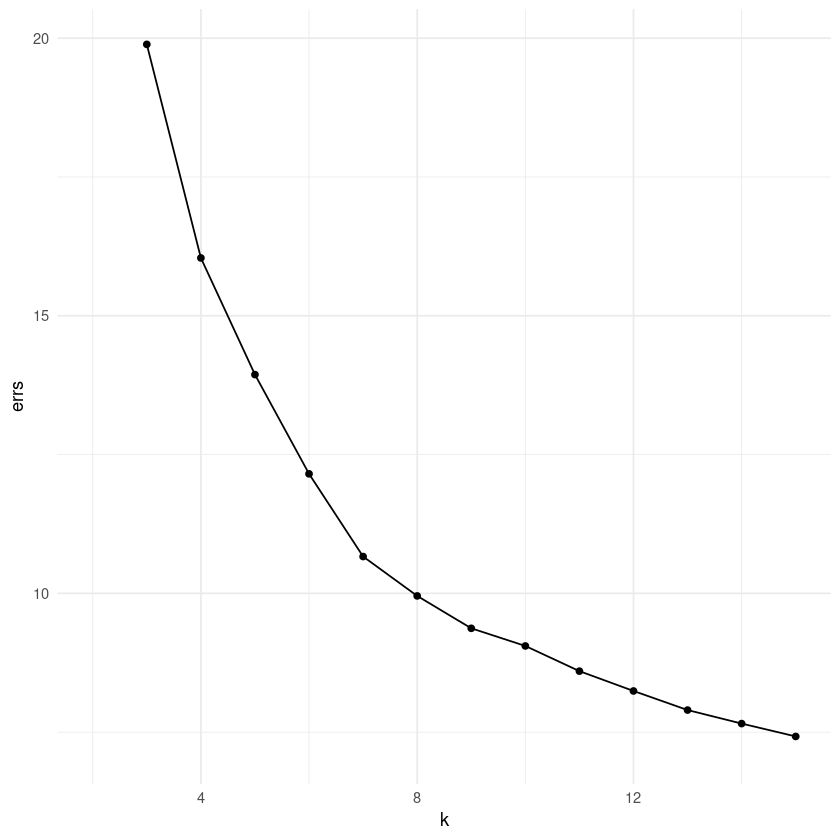

In [59]:
elbow_jw <- ggplot(aes(x = k, y = errs), data = kmeanserrs) + 
geom_line() +
geom_point() + 
theme_minimal()

ggsave("danube_elbow_kmjw.pdf", elbow_jw)
elbow_jw

In [60]:
prototypes_dat <- data.frame(t(kmeansclusterings[[6]]$prototypes))
names(prototypes_dat) <- paste0("P", 1:6)
prototypes_dat$lat = danube$info$Lat
prototypes_dat$lon = danube$info$Long

Saving 6.67 x 6.67 in image


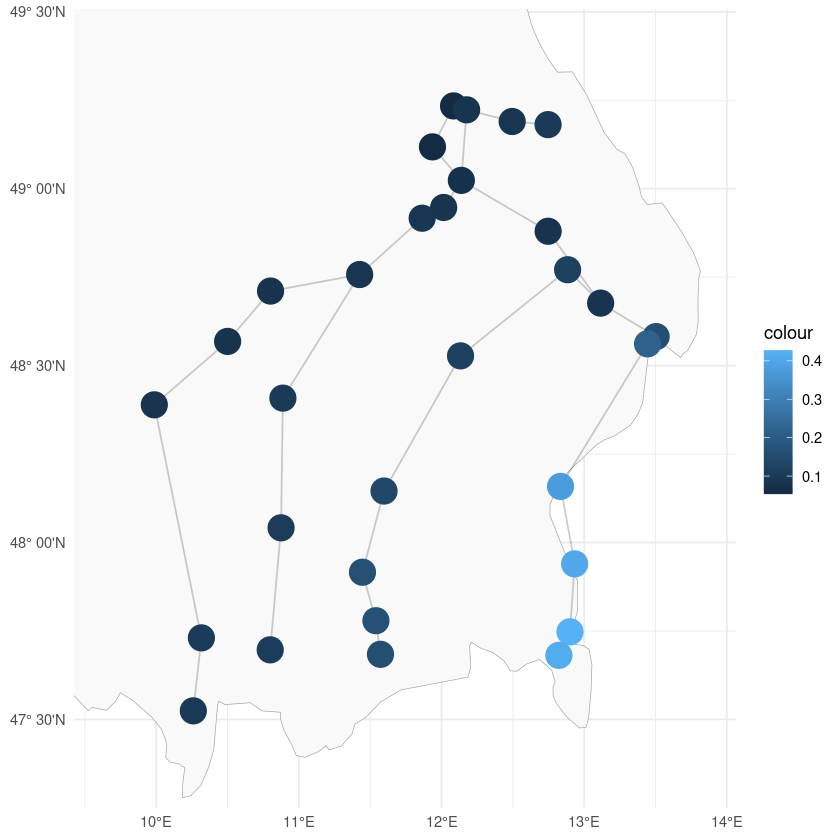

In [61]:
c1 <- p + geom_point(aes(x = lon, y = lat, color = P1), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c1_jw.pdf", c1)
c1

Saving 6.67 x 6.67 in image


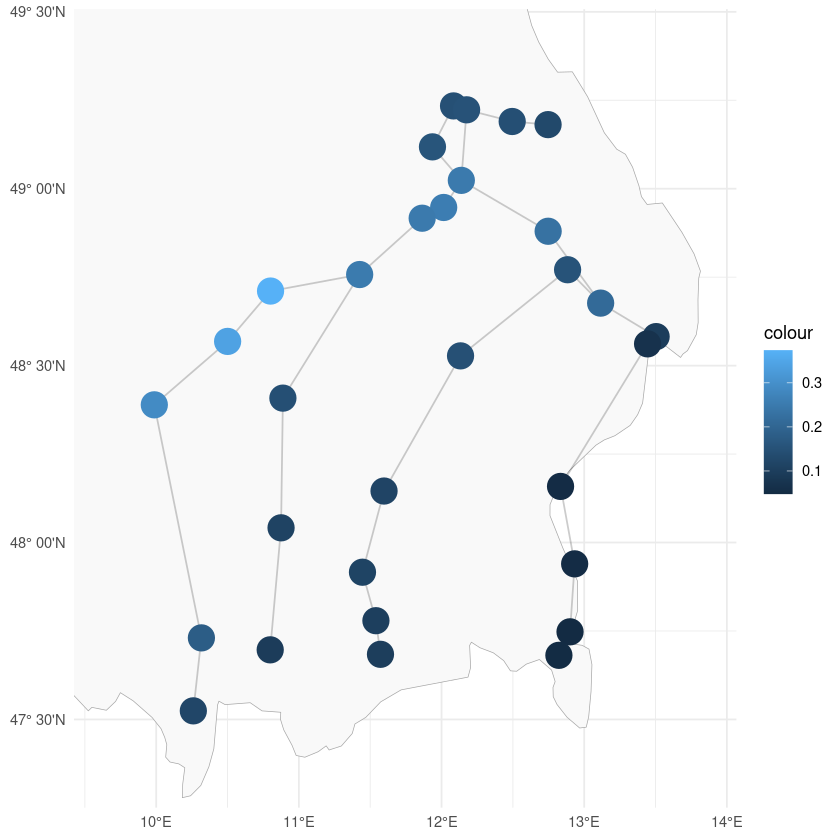

In [62]:
c2 <- p + geom_point(aes(x = lon, y = lat, color = P2), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c2_jw.pdf", c2)
c2

Saving 6.67 x 6.67 in image


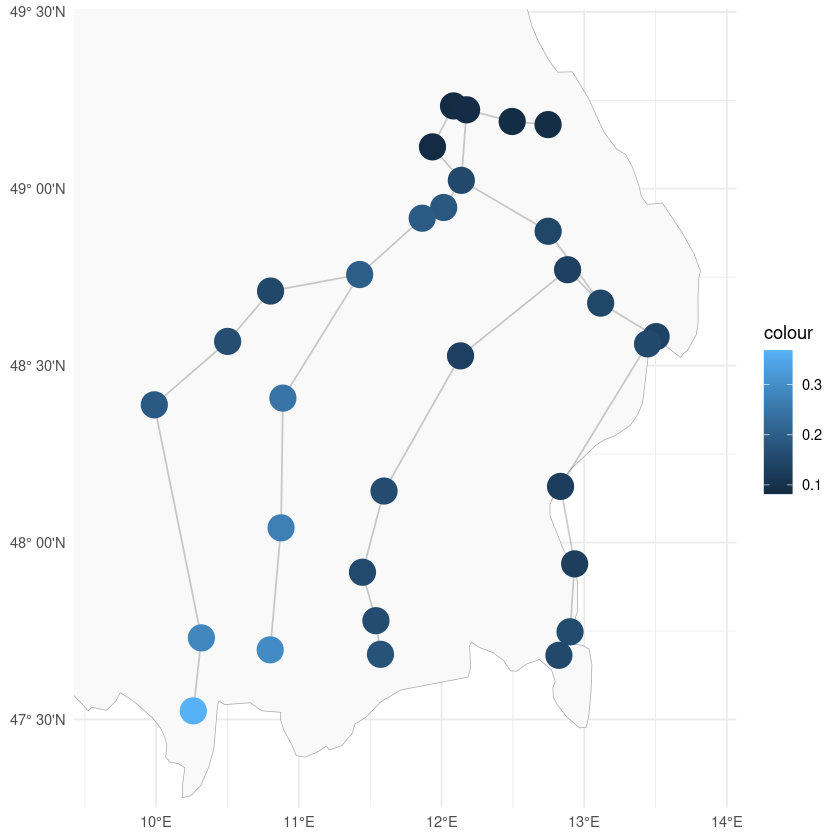

In [63]:
c3 <- p + geom_point(aes(x = lon, y = lat, color = P3), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c3_jw.pdf", c3)
c3

Saving 6.67 x 6.67 in image


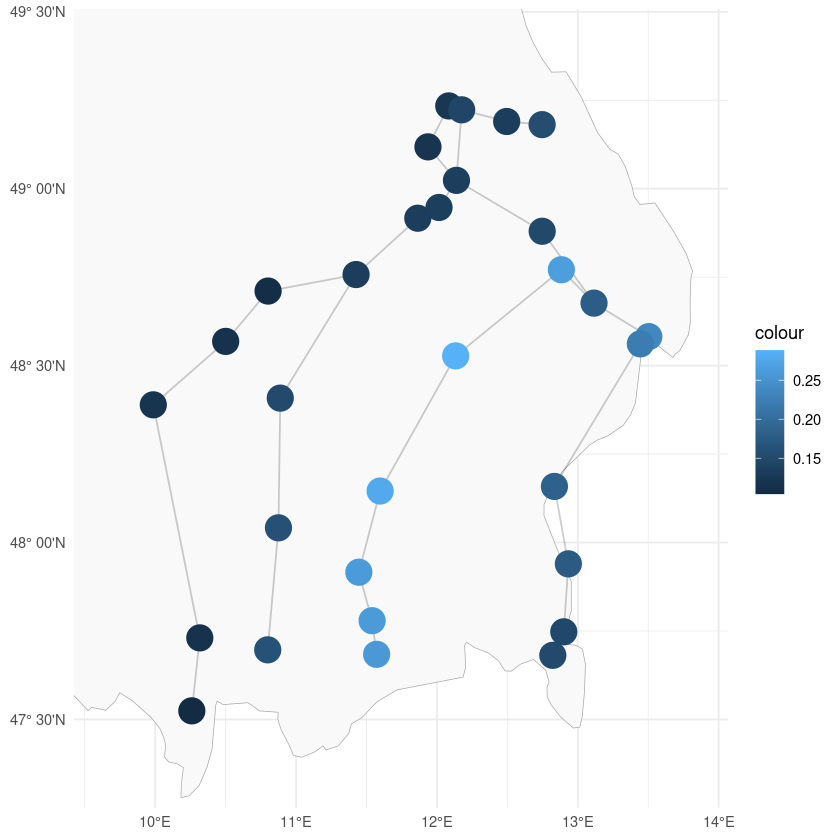

In [64]:
c4 <- p + geom_point(aes(x = lon, y = lat, color = P4), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c4_jw.pdf", c4)
c4

Saving 6.67 x 6.67 in image


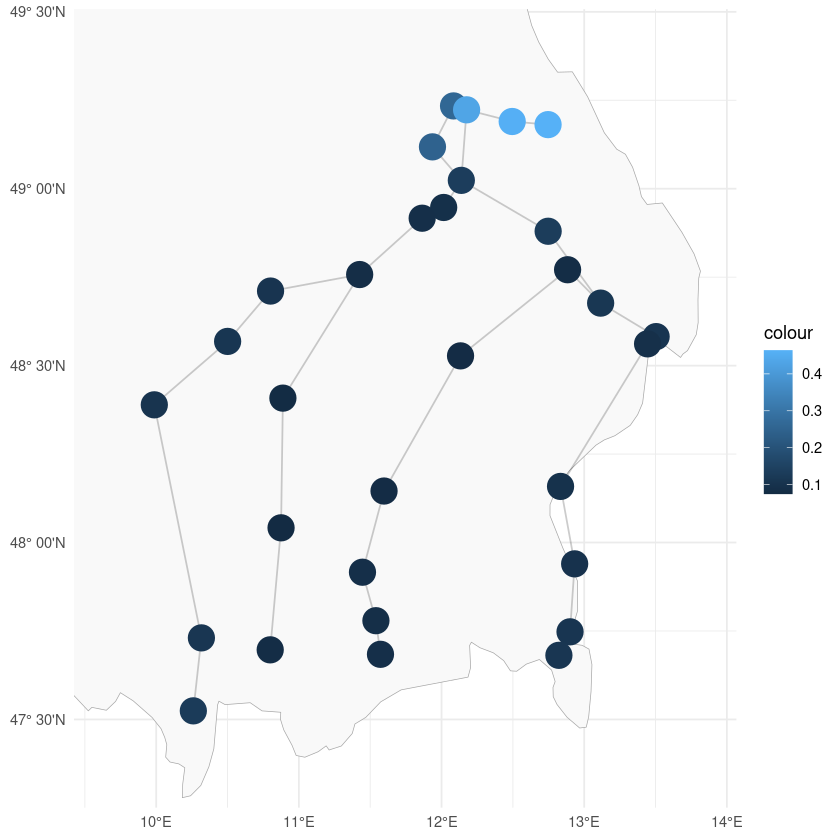

In [65]:
c5 <- p + geom_point(aes(x = lon, y = lat, color = P5), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c5_jw.pdf", c5)
c5

Saving 6.67 x 6.67 in image


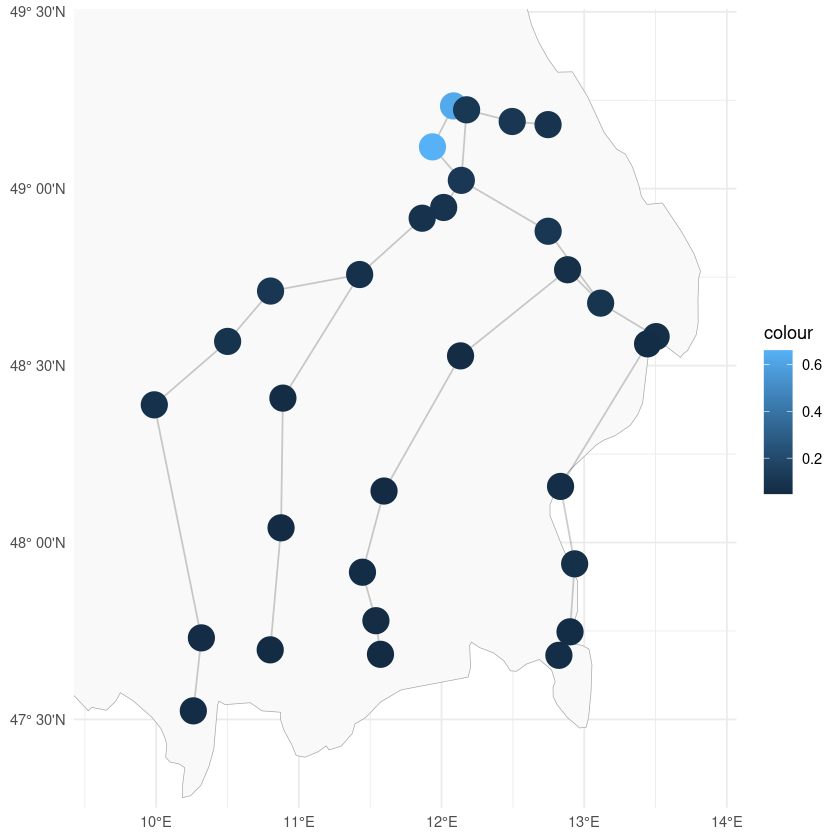

In [66]:
c6 <- p + geom_point(aes(x = lon, y = lat, color = P6), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c6_jw.pdf", c6)
c6